In [32]:
# Open animated GIF

from PIL import Image, ImageOps, ImageEnhance
import imageio.v3 as iio
import numpy as np
from skimage.transform import resize

gif_fn = 'assets/ministry/ministry-1500.GIF'
im = Image.open(gif_fn)
# get image dimensions
imwidth, imheight = im.size
# Iterate over frames, select every other frame
frames = []
for i in range(0, im.n_frames):  # skip first 0 first frames, skip every other frame for 15->7fps
    im.seek(i)
    frame = np.array(im)
    if len(frame.shape) == 3:
        # convert to grayscale
        frame = frame.mean(axis=2)
    # grab 960x600 from center (use image imwidth, imheight to calculate)
    frame = frame[imheight//2-300:imheight//2+300, imwidth//2-480:imwidth//2+480]
    frame = resize(frame, (200, 320), anti_aliasing=True)
    # frame = frame.astype(np.uint8)
    frames.append(frame)


print(f"Number of frames: {len(frames)}")
frames = frames[:195]
print(f"Number of frames: {len(frames)}")

# Apply floyd-steinberg dithering to convert to 1-bit image
def floyd_steinberg_dithering(image):
    image = Image.fromarray(image)
    image = ImageOps.grayscale(image)
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(1.3)  # Increase contrast by 50%
    image = ImageOps.autocontrast(image, cutoff=15)
    # image = image.convert('1')
    return image

frames = [np.array(floyd_steinberg_dithering(frame)) for frame in frames]


Number of frames: 269
Number of frames: 195


In [35]:
# Save as pickle file
import pickle
with open('assets/bond.pkl', 'wb') as f:
    pickle.dump(frames, f)


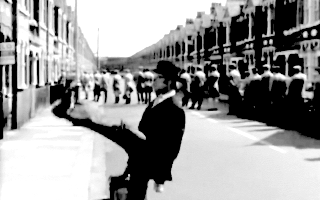

In [34]:
# Display frame
Image.fromarray(frames[50])
